# Importando bibliotecas

In [25]:
#### Definição do Frame Work ####

from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CoolProp.Plots import PropertyPlot

import utils

# Definindo funções

In [26]:
def calc_COP(T_eva_in,delta_P_in):
    T_eva = utils.Experimento.celcius_to_kelvin(T_eva_in)
    delta_P = utils.Experimento.bar_to_pascal(delta_P_in)

    P_baixa = PropsSI("P","T", T_eva,"Q", 1, "R404a")

    P_alta = P_baixa + delta_P

    # ponto 1

    T_1 = T_eva + 8

    H_1 = PropsSI("H","P",P_baixa,"T",T_1,"R404a")

    # ponto 2

    S_1 = PropsSI("S","P",P_baixa,"T",T_1,"R404a")

    H_2 = PropsSI("H","P",P_alta,"S",S_1,"R404a")

    # ponto 3

    T_3_ideal = PropsSI("T","P",P_alta,"Q",0,"R404a")

    T_3 = T_3_ideal - 8 

    H_3 = PropsSI("H","P",P_alta,"T",T_3,"R404a")

    # ponto 4
    H_4 = H_3

    df = pd.DataFrame(
        (
            [H_1,P_baixa],
            [H_2,P_alta],
            [H_3,P_alta],
            [H_4,P_baixa],
        ),
        columns=["Entalpia","Pressao"]
    )

    cop = (H_1 - H_4) / (H_2 - H_1)

    return df,cop

def plot_diagrama_ph(df_list):
        ph_plot = PropertyPlot("R404a", "Ph")
        ph_plot.calc_isolines()
        fig = ph_plot.figure
        fig.set_size_inches(16, 9)
        ax = ph_plot.axis

        for df,legend,color in df_list:

            # definindo listas para fechar o ciclo
            plot_entalpia = df.Entalpia.to_list()
            plot_pressao = df.Pressao.to_list()

            plot_entalpia.append(df.Entalpia[0])
            plot_pressao.append(df.Pressao[0])

            plot_entalpia = [h / 10 ** 3 for h in plot_entalpia]
            plot_pressao = [h / 10 ** 3 for h in plot_pressao]

            ax.plot(
                plot_entalpia,
                plot_pressao,
                "o",
                plot_entalpia,
                plot_pressao,
                "-",
                color=color,
                label=legend
            )

            # anotando os pontos no diagrama

            ax.annotate(
                "S1",
                (
                    df.Entalpia[0] / 1e3 + 5,
                    df.Pressao[0] / 1e3 + 5,
                ),
                size=24,
            )
            ax.annotate(
                "S2",
                (
                    df.Entalpia[1] / 1e3 + 5,
                    df.Pressao[1] / 1e3 + 5,
                ),
                size=24,
            )
            ax.annotate(
                "S3",
                (
                    df.Entalpia[2] / 1e3 + 5,
                    df.Pressao[2] / 1e3 + 5,
                ),
                size=24,
            )
            ax.annotate(
                "S4",
                (
                    df.Entalpia[3] / 1e3 + 5,
                    df.Pressao[3] / 1e3 + 5,
                ),
                size=24,
            )
        ax.tick_params(axis="x", labelsize=24)
        ax.tick_params(axis="y", labelsize=24)
        ax.set_xlabel("Entalpia específica(kJ/kg)", fontsize=24)
        ax.set_ylabel("Pressão (kPa)", fontsize=24)
        ax.legend()

        ph_plot.show()    
        

# Definindo variaveis de entrada

## Antecamara

In [29]:
T_eva_ant = 4
delta_P_ant = 16

df_ant,COP_ant = calc_COP(T_eva_ant,delta_P_ant)

In [30]:
COP_ant

4.314677477909686

In [31]:
df_ant

,Entalpia,Pressao
0,375881.738138,6.805318e+05
1,401533.435364,2.381857e+06
2,265202.937847,2.381857e+06
3,265202.937847,6.805318e+05


## Resfriamento

In [32]:
T_eva_res = -1
delta_P_res = 14

df_res,COP_res = calc_COP(T_eva_res,delta_P_res)

In [33]:
COP_res

4.4603209482803825

In [34]:
df_res

,Entalpia,Pressao
0,373180.465076,5.813720e+05
1,399536.046484,2.082697e+06
2,255626.113220,2.082697e+06
3,255626.113220,5.813720e+05


## Congelamento

In [41]:
T_eva_cong = -23
delta_P_cong = 13

df_cong,COP_cong = calc_COP(T_eva_cong,delta_P_cong)

In [42]:
COP_cong

3.104601468608767

In [43]:
df_cong

,Entalpia,Pressao
0,360436.806312,2.676508e+05
1,398884.713119,1.668976e+06
2,241071.378373,1.668976e+06
3,241071.378373,2.676508e+05


# Diagrama Ph

/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 22876.107561, 602.916479 with index (0,): unable to solve 1phase PY flash with Tmin=199.999, Tmax=200.155 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [58.8469 J/mol/K] is below the minimum value of 58.8660848595 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 23425.216131, 602.916479 with index (1,): unable to solve 1phase PY flash with Tmin=199.999, Tmax=200.523 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [58.8469 J/mol/K] is below the minimum value of 58.8660030697 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 23987.505275, 602.916479 with index 

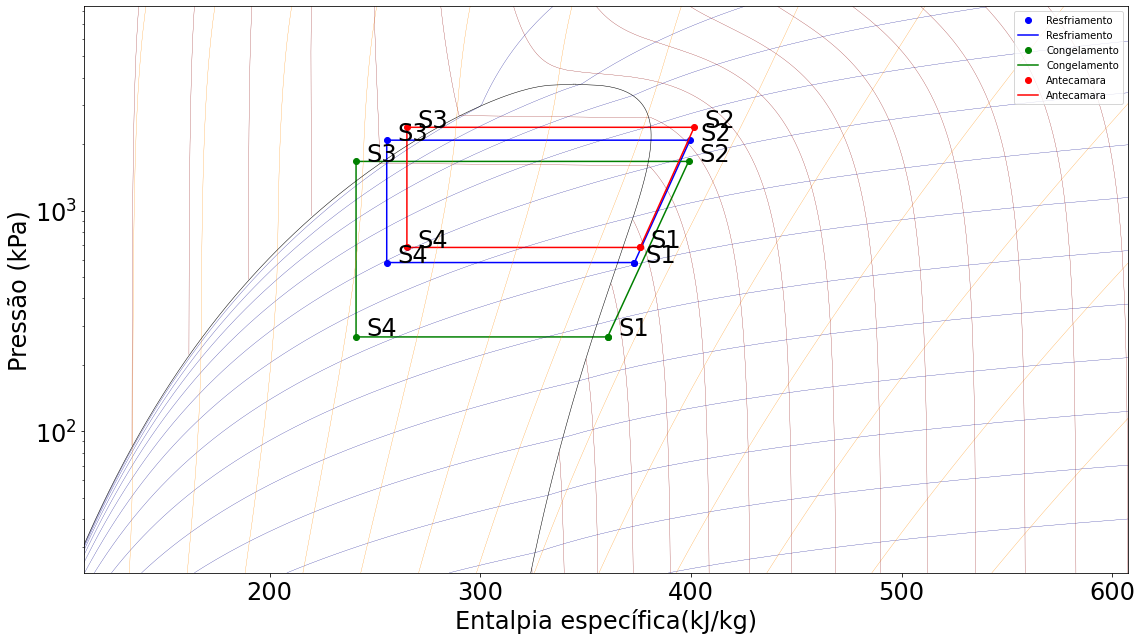

In [44]:
df_list = [
    (df_res,"Resfriamento","blue"),
    (df_cong,"Congelamento","green"),
    (df_ant,"Antecamara","red"),
]


plot_diagrama_ph(df_list)